In [1]:
import matplotlib as plt
# from tensorflow import keras
from file_io import features_from_file, labels_from_file, add_history
from utils import labels_to_categorical, transpose_vector, get_count, get_mean_stddev, normalize_data,norm_multiple
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import time
from thop import profile
import torch
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph


In [11]:
age_model = tf.keras.models.load_model("model/lstm_age_54/Users_60.keras")

input_test_file_gender = "age_data_clean_test/age_in"
output_test_file_gender = "age_data_clean_test/age_out"

In [12]:
def calculate_flops(model, input_shape):
    concrete_function = tf.function(lambda inputs: model(inputs))
    concrete_function = concrete_function.get_concrete_function(
        tf.TensorSpec([1] + input_shape, model.inputs[0].dtype)
    )

    frozen_func, graph_def =convert_variables_to_constants_v2_as_graph(concrete_function)

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name='')
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=graph, run_meta=run_meta, cmd='op', options=opts)
        return flops.total_float_ops
    
input_shape = [35, 54]
flops = calculate_flops(age_model,input_shape)
print(f"FLOPs: {flops}")


FLOPs: 1952064


In [14]:
NUM_FEATURES = 54
input_batch = np.random.random((1000, 35, NUM_FEATURES))

# Load your model
model = age_model
for _ in range(10):
    _ = model.predict(input_batch)
    
start_time = time.time()
_ = model.predict(input_batch)
end_time = time.time()

total_inference_time = end_time - start_time
average_inference_time = total_inference_time / len(input_batch)

print(f"Total inference time for 800 samples: {total_inference_time * 1000:.5f} ms")
print(f"Average inference time per sample: {average_inference_time * 1000:.5f} ms")

32/32 [==============================] - 0s 4ms/step
Total inference time for 800 samples: 207.89099 ms
Average inference time per sample: 0.20789 ms


In [ ]:
from torchprofile import profile_macs

inputs = torch.randn(800,35,54)
macs = profile_macs(age_model, inputs)

TypeError: Exception encountered when calling layer 'forward_lstm' (type LSTM).

Cannot convert the argument `type_value`: torch.float32 to a TensorFlow DType.

Call arguments received by layer 'forward_lstm' (type LSTM):
  • inputs=tensor([[[-6.0478e-01, -6.0700e-01,  2.5624e-01,  ..., -9.7066e-01,
          -1.6828e+00,  1.0622e+00],
         [-6.7619e-01, -1.0976e-01, -1.9968e+00,  ...,  2.7667e-01,
           1.2216e+00,  6.2580e-01],
         [-9.2555e-01, -5.0906e-01,  2.7472e-01,  ...,  1.3156e+00,
          -4.7516e-01, -1.3319e+00],
         ...,
         [ 7.2520e-01,  1.0245e+00, -2.1109e-01,  ..., -7.7631e-01,
           1.9183e+00,  4.6501e-01],
         [ 2.1534e-01,  4.5333e-01, -6.6161e-01,  ...,  7.5037e-01,
           1.2314e+00, -2.6756e-02],
         [ 8.8700e-01, -5.0356e-01,  1.1128e+00,  ...,  7.6448e-01,
           2.2817e+00, -1.2965e+00]],

        [[ 1.5900e+00, -3.5496e-01,  6.3233e-01,  ..., -2.9875e-01,
          -1.9230e+00,  8.1934e-01],
         [ 1.2399e+00, -1.5541e+00,  2.6206e-01,  ...,  4.0922e-01,
           1.5270e+00, -1.5098e+00],
         [ 2.1125e-02, -1.7546e+00, -9.8533e-02,  ...,  1.2558e+00,
          -1.8987e+00,  1.0881e+00],
         ...,
         [-1.2362e+00,  8.1143e-01,  8.9135e-01,  ...,  2.1110e+00,
           9.6974e-01,  2.5641e-02],
         [-7.4598e-01,  1.1904e+00, -2.2573e+00,  ..., -1.0145e+00,
           3.0942e-01, -6.7027e-01],
         [ 1.3797e-02,  3.7821e-01,  6.0165e-01,  ..., -2.5127e-01,
           1.2904e+00,  1.4204e+00]],

        [[ 2.4594e-01, -1.9942e-01, -1.4532e+00,  ...,  2.9313e-01,
           9.3184e-01, -1.0768e+00],
         [-2.6236e+00,  4.6455e-01,  1.2370e-03,  ..., -5.8302e-01,
          -7.2831e-01,  4.4306e-01],
         [ 2.9969e-01,  2.6827e-01, -6.8219e-01,  ..., -1.1116e-01,
          -4.4132e-02,  9.8529e-01],
         ...,
         [ 1.1430e+00,  3.1652e-01, -5.8572e-01,  ...,  5.8157e-01,
           4.5343e-02, -2.6491e-01],
         [-2.5162e-01,  5.3547e-01, -3.0802e-01,  ...,  5.3251e-01,
           5.7198e-01,  1.9476e-01],
         [ 7.3510e-01, -9.7235e-02,  4.7840e-01,  ..., -1.2809e+00,
           9.1037e-01,  3.6758e-02]],

        ...,

        [[ 1.2484e-01,  3.0941e-01,  2.7014e-01,  ...,  5.1553e-01,
          -2.3547e+00, -2.4301e+00],
         [-7.8728e-01,  9.7465e-02,  1.3333e+00,  ...,  4.2408e-01,
          -2.3878e-01,  1.9211e-01],
         [ 3.3526e-01,  2.4886e+00, -4.5470e-02,  ...,  6.7790e-01,
          -5.3103e-01, -7.4061e-01],
         ...,
         [-4.5795e-01, -9.8952e-01, -5.5370e-01,  ...,  1.0857e+00,
           6.5368e-01,  9.1285e-02],
         [ 1.6686e+00, -1.6853e+00, -1.7544e+00,  ...,  1.1551e+00,
          -9.0677e-01,  1.8911e+00],
         [ 8.0174e-01,  3.5997e-01, -3.0610e+00,  ...,  4.9370e-01,
           4.9806e-01, -9.2665e-01]],

        [[ 1.4451e+00,  2.4485e-01, -1.3906e+00,  ...,  2.1666e+00,
           5.0548e-02,  1.8987e-01],
         [-1.4937e+00,  4.3213e-01, -6.4530e-01,  ..., -1.1559e+00,
          -2.8533e-01, -8.2004e-01],
         [-7.6222e-02, -1.7426e+00,  1.7556e+00,  ...,  8.7850e-01,
          -3.7060e-01, -2.7858e-01],
         ...,
         [ 2.0945e-01, -5.5088e-01,  1.4446e-01,  ..., -1.0273e-01,
           1.5781e+00, -1.2051e+00],
         [ 2.0588e-01, -1.1253e+00,  1.1777e+00,  ..., -6.9402e-01,
           1.2412e+00, -3.1031e-01],
         [-6.2970e-01, -4.2145e-01, -5.7509e-01,  ...,  1.5770e-01,
          -1.2304e+00,  1.0276e+00]],

        [[-3.7139e-02,  1.4996e+00, -1.2386e+00,  ..., -2.8354e-01,
          -1.3636e+00,  1.2359e-01],
         [-1.3299e+00,  8.3706e-01, -6.3764e-01,  ..., -4.7392e-01,
          -5.1389e-01,  1.9852e+00],
         [-3.4137e-01,  2.9797e+00,  2.7456e-01,  ...,  6.3938e-02,
          -1.9551e+00,  1.9984e-01],
         ...,
         [ 1.8686e-01, -9.5570e-02,  1.1728e+00,  ..., -6.3742e-01,
          -6.4824e-01, -9.7228e-02],
         [-6.2117e-01, -4.4441e-01,  1.2022e-01,  ..., -1.7357e+00,
          -8.3688e-01, -1.2747e+00],
         [-1.4288e+00, -9.8417e-02,  8.2405e-01,  ...,  3.8792e-01,
          -5.9499e-01,  7.7640e-01]]])
  • mask=None
  • training=None
  • initial_state=None

In [ ]:

input_test = features_from_file(input_test_file_gender, 54)
input_test = transpose_vector(input_test)
output_test = labels_from_file(output_test_file_gender)
output_test = labels_to_categorical(output_test)

X_age_test = input_test
Y_age_test = output_test

In [4]:
means, std_dev = get_mean_stddev(X_age_test)
X_age_test = normalize_data(X_age_test, means, std_dev)

In [5]:
X_age_test[0].shape

(35, 54)

In [ ]:
start_time = time.time()
y_pred = age_model.predict(X_age_test)
end_time = time.time()

print(f"Total Inference time: {(end_time - start_time) * 1000:.2f} ms")
print(f"Average inference time: {((end_time - start_time)/X_age_test.shape[0]) * 1000:.5f} ms")

25/25 [==============================] - 0s 7ms/step
Total Inference time: 246.64 ms
Average inference time: 0.30830 ms


In [24]:
max_indices = np.argmax(y_pred, axis=1)
y_pred[:] = 0
# Set the maximum value in each row to 1
for i, max_index in enumerate(max_indices):
    y_pred[i, max_index] = 1

y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
current_matrix = np.array([[1],[2],[3],[4],[5]])
Y_age_test_class = Y_age_test @ current_matrix
Y_age_test_class = Y_age_test_class[:,0].T

In [26]:
y_pred_class = y_pred @ current_matrix
y_pred_class = y_pred_class[:,0].T

In [27]:
conf_matrix = confusion_matrix(Y_age_test_class, y_pred_class)
row_sums = conf_matrix.sum(axis=1)
norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]
acc_score = accuracy_score(Y_age_test_class, y_pred_class)
print("Score of prediction:", acc_score)

Score of prediction: 0.73375


In [28]:
labels = [ "fifties_sixties","fourties", "teens",
    "thirties", "twenties"]


<Axes: >

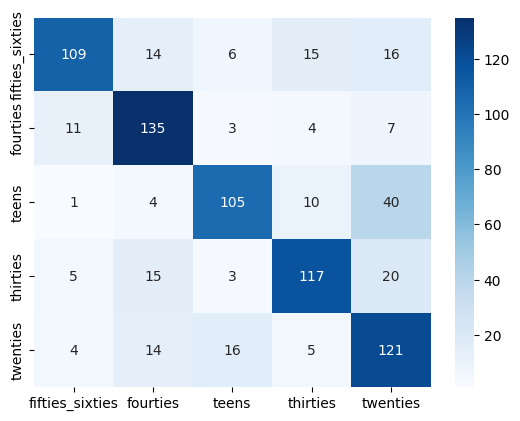

In [29]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

<Axes: >

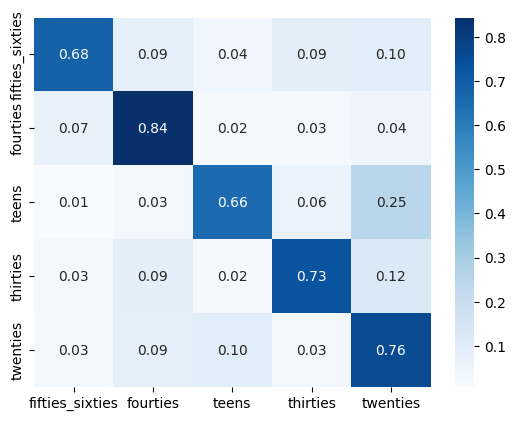

In [30]:
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)

In [31]:
report = classification_report(Y_age_test_class, y_pred_class, target_names=labels, digits=5)
print(report)

                 precision    recall  f1-score   support

fifties_sixties    0.83846   0.68125   0.75172       160
       fourties    0.74176   0.84375   0.78947       160
          teens    0.78947   0.65625   0.71672       160
       thirties    0.77483   0.73125   0.75241       160
       twenties    0.59314   0.75625   0.66484       160

       accuracy                        0.73375       800
      macro avg    0.74753   0.73375   0.73503       800
   weighted avg    0.74753   0.73375   0.73503       800



C:\Users\admin\AppData\Local\Temp\ipykernel_1592\3770540850.py:6: WavFileWarning: Reached EOF prematurely; finished at 2512332 bytes, expected 2512340 bytes from header.
  sample_rate, data = wavfile.read('C:/Users/admin/Documents/AgeDetection/voice-bases-age-gender-classification/audio/female2_2.wav')


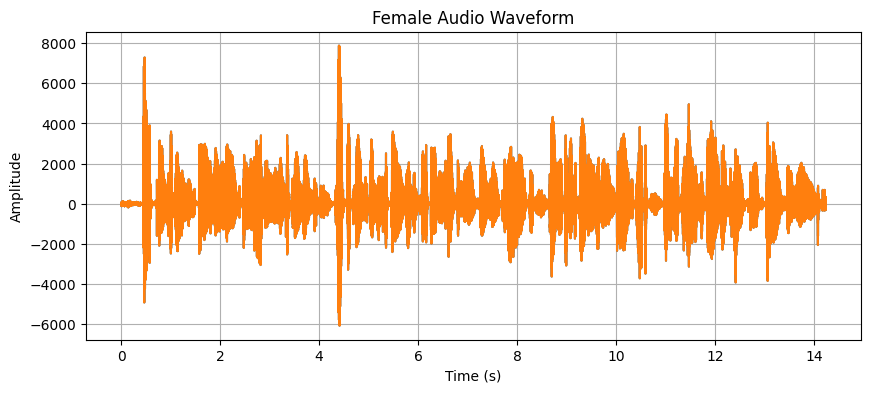

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sample_rate, data = wavfile.read('C:/Users/admin/Documents/AgeDetection/voice-bases-age-gender-classification/audio/female2_2.wav')

# Calculate the time array
time = np.arange(0, len(data)) / sample_rate

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Female Audio Waveform')
plt.grid(True)
plt.show()

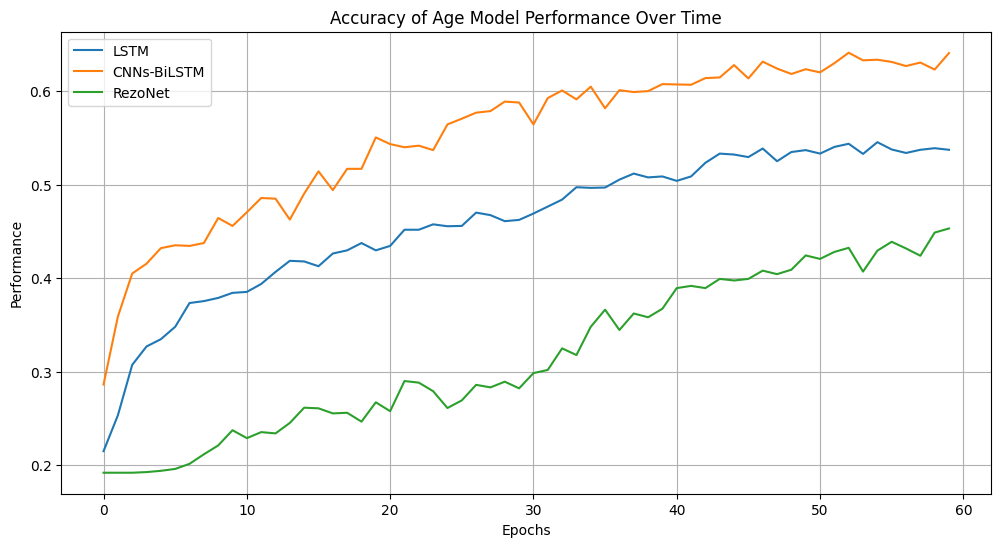

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Age_valid_accuracy.csv")


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LSTM'], linestyle='-', label='LSTM')
plt.plot(df.index, df['CNNs-BiLSTM'], linestyle='-', label='CNNs-BiLSTM')
plt.plot(df.index, df['RezoNet'], linestyle='-', label='RezoNet')

# Adding titles and labels
plt.title('Accuracy of Age Model Performance Over Time')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

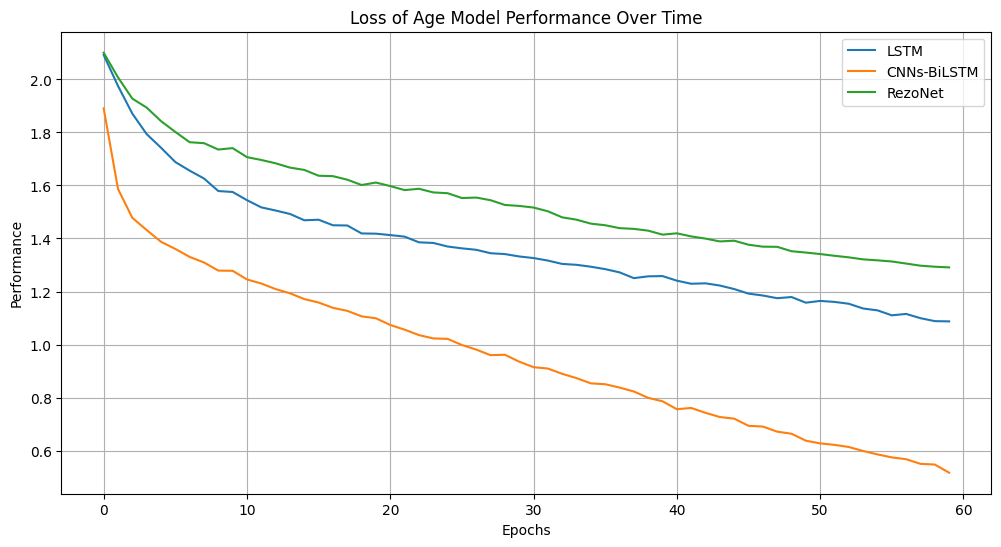

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Age_valid_loss.csv")


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LSTM'], linestyle='-', label='LSTM')
plt.plot(df.index, df['CNNs-BiLSTM'], linestyle='-', label='CNNs-BiLSTM')
plt.plot(df.index, df['RezoNet'], linestyle='-', label='RezoNet')

# Adding titles and labels
plt.title('Loss of Age Model Performance Over Time')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)

# Show plot
plt.show()